# 6. Приближенное решение краевой задачи для обыкновенного дифференциального уравнения

Требуется методом прогонки с краевыми условиями первого и второго порядка найти приближенное решение краевой задачи для обыкновенного дифференциального уравнения на отрезке $ [0, 1] $ с точностью $ h = 0.05 $.

$$ u'' - \frac{2x}{1 + x^2} u' - \frac{2 (1 - x^2)}{(1 + x^2)^2} u = - \frac{5 (x^5 + 2x^3 + 3x)}{2 (1 + x^2)^2} $$
$$$$
$$ 2u(0) + u'(0) = 2, \space \space u'(1) = 1.3916 $$
$$$$

Решение задачи:
$$ u_0(x) = 2 (1 + x^2) \arctan (x) - \frac{5}{4} x^3 $$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def u(x):
    return 2 * (1 + x ** 2) * np.arctan(x) - (5 / 4) * x ** 3

def u_derivative(x):
    return 4 * x * np.arctan(x) + 2 - (15 / 4) * x ** 2

def u_derivative2(x):
    return 4 * np.arctan(x) + 4 * x / (1 + x ** 2) - (15 / 2) * x

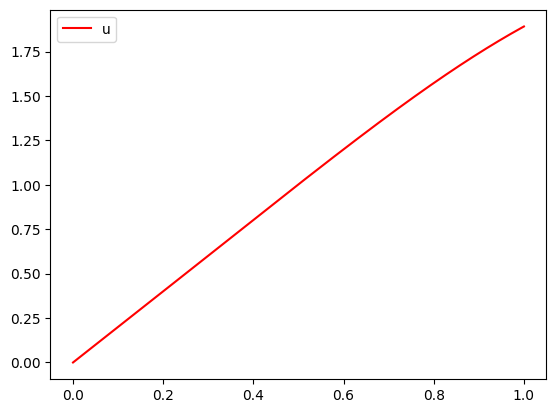

In [17]:
x = np.linspace(0, 1, 10000)
plt.plot(x, u(x), label="u", c="red")
plt.legend()
plt.show()

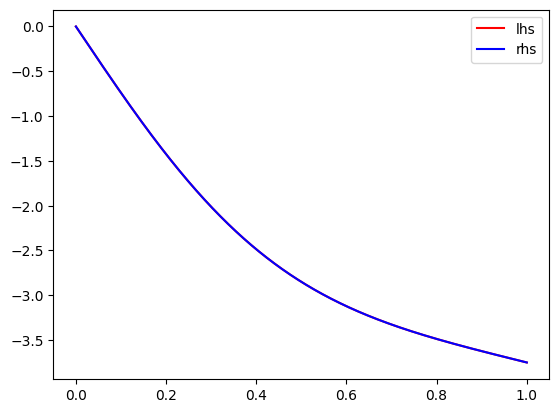

In [18]:
def a(x):
    return 1
def b(x):
    return -(2 * x) / (1 + x ** 2)
def c(x):
    return -(2 * (1 - x ** 2)) / (1 + x ** 2) ** 2
def d(x):
    return -5 * (x ** 5 + 2 * x ** 3 + 3 * x) / (2 * (1 + x ** 2) ** 2)

def ode(x, u=u, u_derivative=u_derivative, u_derivative2=u_derivative2):
    return a(x) * u_derivative2(x) + b(x) * u_derivative(x) + c(x) * u(x)

x = np.linspace(0, 1, 10000)
plt.plot(x, ode(x), label="lhs", c="red")
plt.plot(x, d(x), label="rhs", c="blue")
plt.legend()
plt.show()

## Метод прогонки

Метод прогонки состоит из двух этапов: прямого и обратного хода.

### Прямой ход

Ищем решение в виде:
$$ u_i = \alpha_{i+1} u_{i+1} + \beta_{i+1}, \quad i = 0,1,\dots,N-1 $$

Подставим это представление в разностное уравнение:
$$ A_i(\alpha_i u_i + \beta_i) + B_i u_i + C_i u_{i+1} = D_i $$

Перегруппируем:
$$ u_i(A_i \alpha_i + B_i) + A_i \beta_i + C_i u_{i+1} = D_i $$

Выразим $u_i$ через $u_{i+1}$:
$$ u_i = -\frac{C_i}{A_i \alpha_i + B_i} u_{i+1} + \frac{D_i - A_i \beta_i}{A_i \alpha_i + B_i} $$

Сравнивая с исходным представлением, получаем рекуррентные формулы:
$$
\begin{aligned}
\alpha_{i+1} &= -\frac{C_i}{A_i \alpha_i + B_i} \\
\beta_{i+1} &= \frac{D_i - A_i \beta_i}{A_i \alpha_i + B_i}
\end{aligned}
$$

Начальные условия определяются из левого граничного условия:
$$ u_0 = \alpha = \alpha_1 u_1 + \beta_1 $$

Отсюда:
$$ \alpha_1 = 0, \quad \beta_1 = \alpha $$

### Обратный ход

Используя правое граничное условие $u_N = \beta$ и прогоночные коэффициенты, последовательно находим:
$$
\begin{aligned}
u_N &= \beta \\
u_{N-1} &= \alpha_N u_N + \beta_N \\
u_{N-2} &= \alpha_{N-1} u_{N-1} + \beta_{N-1} \\
&\vdots \\
u_1 &= \alpha_2 u_2 + \beta_2
\end{aligned}
$$

In [19]:
def solve_tridiagonal(A, B, C, D, n):
    alpha = np.zeros(n)
    beta = np.zeros(n)

    alpha[0] = -C[0] / B[0]
    beta[0] = D[0] / B[0]

    for i in range(1, n):
        denom = B[i] + A[i] * alpha[i-1]
        alpha[i] = -C[i] / denom
        beta[i] = (D[i] - A[i] * beta[i-1]) / denom

    u = np.zeros(n)
    u[-1] = beta[-1]

    for i in range(n-2, -1, -1):
        u[i] = alpha[i] * u[i+1] + beta[i]

    return u

In [20]:
def first_order(h=0.05):
    n = int(1/h) + 1
    x_vals = np.linspace(0, 1, n)

    A = np.zeros(n)
    B = np.zeros(n)
    C = np.zeros(n)
    D = np.zeros(n)

    for i in range(1, n-1):
        x = x_vals[i]
        A[i] = 1/h**2 - b(x)/(2*h)
        B[i] = -2/h**2 + c(x)
        C[i] = 1/h**2 + b(x)/(2*h)
        D[i] = d(x)

    B[0] = 2 - 1/h
    C[0] = 1/h
    D[0] = 2

    A[n-1] = -1/h
    B[n-1] = 1/h
    D[n-1] = 1.3916

    return solve_tridiagonal(A, B, C, D, n), x_vals

In [21]:
def second_order(h=0.05):
    n = int(1/h) + 1
    x_vals = np.linspace(0, 1, n)

    A = np.zeros(n)
    B = np.zeros(n)
    C = np.zeros(n)
    D = np.zeros(n)

    for i in range(1, n-1):
        x = x_vals[i]
        A[i] = 1/h**2 - b(x)/(2*h)
        B[i] = -2/h**2 + c(x)
        C[i] = 1/h**2 + b(x)/(2*h)
        D[i] = d(x)

    A1 = 1/h**2 - b(x_vals[1])/(2*h)
    B1 = -2/h**2 + c(x_vals[1])
    C1 = 1/h**2 + b(x_vals[1])/(2*h)
    D1 = d(x_vals[1])

    B[0] = (4*h - 3)*C1 + A1
    C[0] = 4*C1 + B1
    D[0] = 2*2*h*C1 + D1

    ANm1 = 1/h**2 - b(x_vals[-2])/(2*h)
    BNm1 = -2/h**2 + c(x_vals[-2])
    CNm1 = 1/h**2 + b(x_vals[-2])/(2*h)
    DNm1 = d(x_vals[-2])

    A[-1] = -4*ANm1 - BNm1
    B[-1] = 3*ANm1 - CNm1
    D[-1] = 2*h*1.3916*ANm1 - DNm1

    return solve_tridiagonal(A, B, C, D, n), x_vals

In [22]:
h = 0.05
u_first, x_first = first_order(h)
u_second, x_second = second_order(h)
u_exact = u(x_first)

error_first = np.abs(u_first - u_exact)
error_second = np.abs(u_second - u_exact)

In [23]:
def check_boundary_conditions(u, x, h, order):
    n = len(u)

    if order == 1:
        u_prime_left = (u[1] - u[0])/h
        left_condition = 2*u[0] + u_prime_left

        u_prime_right = (u[-1] - u[-2])/h
        right_condition = u_prime_right

    else:
        u_prime_left = (-3*u[0] + 4*u[1] - u[2])/(2*h)
        left_condition = 2*u[0] + u_prime_left

        u_prime_right = (3*u[-1] - 4*u[-2] + u[-3])/(2*h)
        right_condition = u_prime_right

    return left_condition, right_condition


left_exact = 2*u_exact[0] + u_derivative(0)
right_exact = u_derivative(1)

left_first, right_first = check_boundary_conditions(u_first, x_first, h, 1)
left_second, right_second = check_boundary_conditions(u_second, x_second, h, 2)

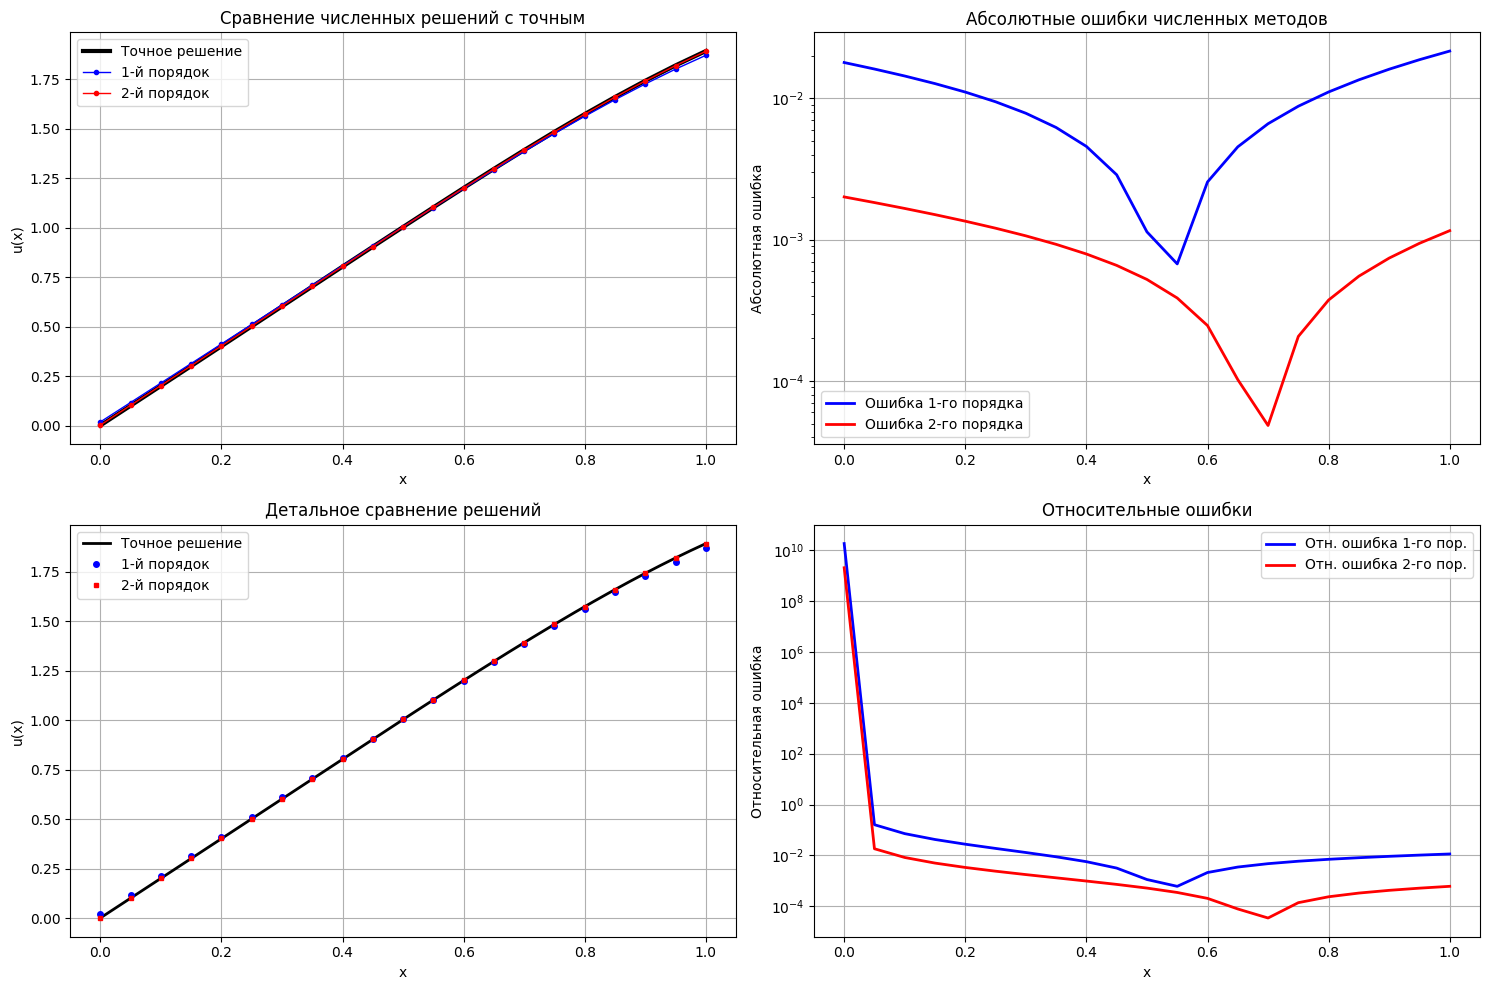

In [24]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(x_first, u_exact, 'k-', linewidth=3, label='Точное решение')
plt.plot(x_first, u_first, 'bo-', markersize=3, linewidth=1, label='1-й порядок')
plt.plot(x_second, u_second, 'ro-', markersize=3, linewidth=1, label='2-й порядок')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Сравнение численных решений с точным')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x_first, error_first, 'b-', linewidth=2, label='Ошибка 1-го порядка')
plt.plot(x_first, error_second, 'r-', linewidth=2, label='Ошибка 2-го порядка')
plt.xlabel('x')
plt.ylabel('Абсолютная ошибка')
plt.title('Абсолютные ошибки численных методов')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.subplot(2, 2, 3)
x_dense = np.linspace(0, 1, 200)
u_dense = u(x_dense)
plt.plot(x_dense, u_dense, 'k-', linewidth=2, label='Точное решение')
plt.plot(x_first, u_first, 'bo', markersize=4, label='1-й порядок')
plt.plot(x_second, u_second, 'rs', markersize=3, label='2-й порядок')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Детальное сравнение решений')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
relative_error_first = error_first / (np.abs(u_exact) + 1e-12)
relative_error_second = error_second / (np.abs(u_exact) + 1e-12)
plt.plot(x_first, relative_error_first, 'b-', linewidth=2, label='Отн. ошибка 1-го пор.')
plt.plot(x_first, relative_error_second, 'r-', linewidth=2, label='Отн. ошибка 2-го пор.')
plt.xlabel('x')
plt.ylabel('Относительная ошибка')
plt.title('Относительные ошибки')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

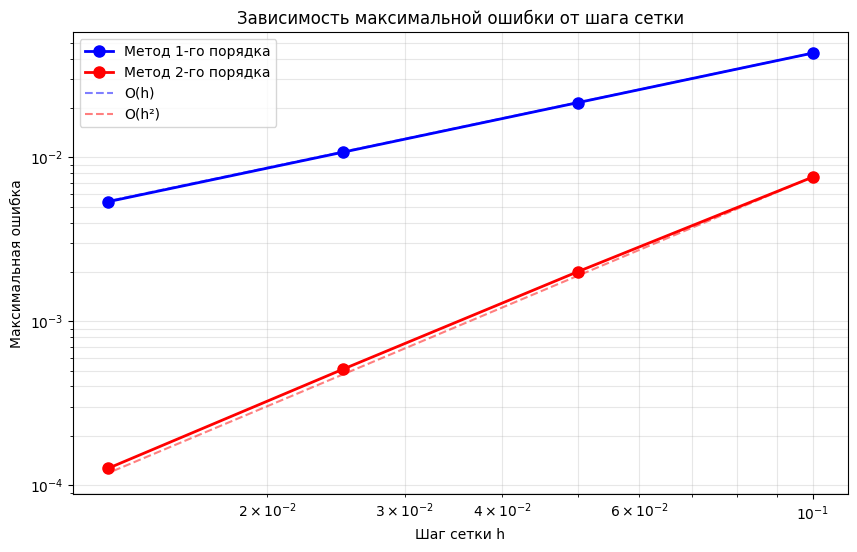

In [25]:
h_values = np.array([0.1, 0.05, 0.025, 0.0125])
max_error_1 = []
max_error_2 = []

for h_val in h_values:
    u1, x1 = first_order(h_val)
    u2, x2 = second_order(h_val)
    ue = u(x1)

    max_error_1.append(np.max(np.abs(u1 - ue)))
    max_error_2.append(np.max(np.abs(u2 - ue)))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, max_error_1, 'bo-', linewidth=2, markersize=8, label='Метод 1-го порядка')
plt.loglog(h_values, max_error_2, 'ro-', linewidth=2, markersize=8, label='Метод 2-го порядка')

plt.xlabel('Шаг сетки h')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость максимальной ошибки от шага сетки')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

plt.loglog(h_values, max_error_1[0] * h_values / h_values[0], 'b--', alpha=0.5, label='O(h)')
plt.loglog(h_values, max_error_2[0] * (h_values / h_values[0])**2, 'r--', alpha=0.5, label='O(h²)')

plt.legend()
plt.show()

In [26]:
print("\nРезультаты решения (сравнение с точным решением):")
print("    x      Точное     1-й пор.    Ошибка 1   2-й пор.    Ошибка 2")
print("-" * 70)
for i in range(0, len(x_first), 4):
    error1 = abs(u_first[i] - u_exact[i])
    error2 = abs(u_second[i] - u_exact[i])
    print(f"{x_first[i]:6.3f}   {u_exact[i]:9.6f}  {u_first[i]:9.6f}  {error1:9.2e}  {u_second[i]:9.6f}  {error2:9.2e}")

print(f"\nПроверка краевых условий:")
print("Метод          2u(0)+u'(0)   u'(1)       Ошибка лев.    Ошибка прав.")
print("-" * 70)
print(f"Точное        {left_exact:11.6f}  {right_exact:11.6f}  {abs(left_exact-2):13.2e}  {abs(right_exact-1.3916):13.2e}")
print(f"1-й порядок   {left_first:11.6f}  {right_first:11.6f}  {abs(left_first-2):13.2e}  {abs(right_first-1.3916):13.2e}")
print(f"2-й порядок   {left_second:11.6f}  {right_second:11.6f}  {abs(left_second-2):13.2e}  {abs(right_second-1.3916):13.2e}")


Результаты решения (сравнение с точным решением):
    x      Точное     1-й пор.    Ошибка 1   2-й пор.    Ошибка 2
----------------------------------------------------------------------
 0.000    0.000000   0.017908   1.79e-02   0.002006   2.01e-03
 0.200    0.400583   0.411649   1.11e-02   0.401934   1.35e-03
 0.400    0.802775   0.807341   4.57e-03   0.803566   7.92e-04
 0.600    1.199941   1.197381   2.56e-03   1.200188   2.47e-04
 0.800    1.573150   1.562064   1.11e-02   1.572776   3.74e-04
 1.000    1.891593   1.870007   2.16e-02   1.890435   1.16e-03

Проверка краевых условий:
Метод          2u(0)+u'(0)   u'(1)       Ошибка лев.    Ошибка прав.
----------------------------------------------------------------------
Точное           2.000000     1.391593       0.00e+00       7.35e-06
1-й порядок      2.000000     1.391600       2.22e-16       4.44e-16
2-й порядок      2.000000     1.391600       0.00e+00       4.44e-16
